# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

You can use patsy instead of pandas to handle the categorical variables if you like.

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
data_url = "http://data.princeton.edu/wws509/datasets/salary.dat"


In [3]:
# Load the data (use delim_whitespace=True)
import urllib
urllib.urlretrieve (data_url, "salary.data")
names = ['sx','rk','yr','dg','yd','sl']
import pandas as pd
df = pd.read_csv("salary.data", delim_whitespace=True)

# Take a look
df.head()
df.describe(include='all')

,sx,rk,yr,dg,yd,sl
count,52,52,52.000000,52,52.000000,52.000000
unique,2,3,NaN,2,NaN,NaN
top,male,full,NaN,doctorate,NaN,NaN
freq,38,20,NaN,34,NaN,NaN
mean,NaN,NaN,7.480769,NaN,16.115385,23797.653846
std,NaN,NaN,5.507536,NaN,10.222340,5917.289154
min,NaN,NaN,0.000000,NaN,1.000000,15000.000000
25%,NaN,NaN,3.000000,NaN,6.750000,18246.750000
50%,NaN,NaN,7.000000,NaN,15.500000,23719.000000
75%,NaN,NaN,11.000000,NaN,23.250000,27258.500000


In [4]:
# Apply value_counts() to series for "sx", "dg", and "rk"
df.sx.value_counts() 

male      38
female    14
Name: sx, dtype: int64

In [5]:
df.dg.value_counts()

doctorate    34
masters      18
Name: dg, dtype: int64

In [6]:
df.rk.value_counts() 

full         20
assistant    18
associate    14
Name: rk, dtype: int64

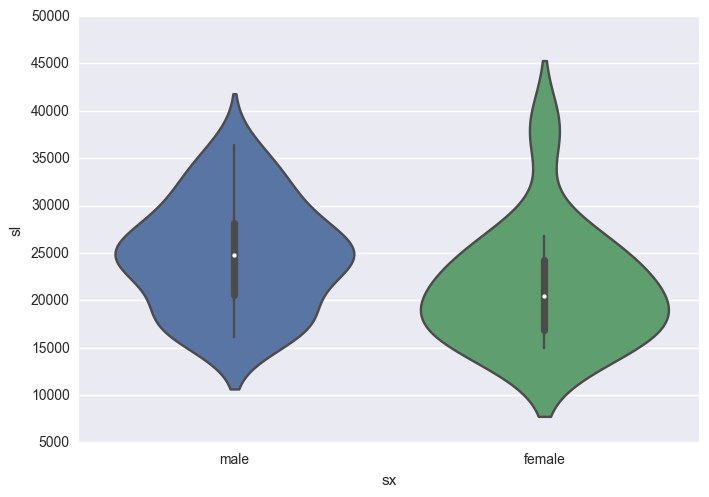

In [7]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Do the same for "dg" and "rk"

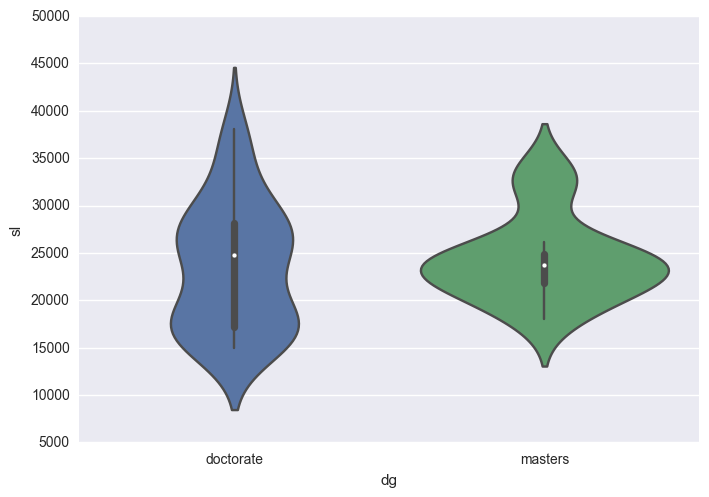

In [8]:
# Make violin plots
sns.violinplot(x="dg", y="sl", data=df)
plt.show()



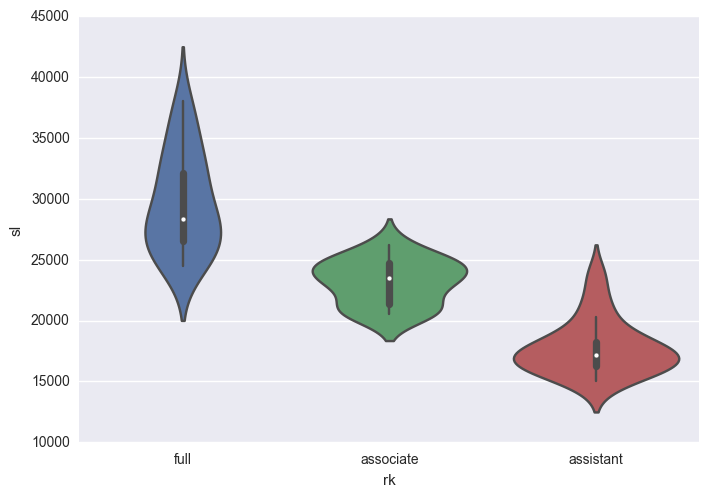

In [9]:
# Make violin plots
sns.violinplot(x="rk", y="sl", data=df)
plt.show()

In [10]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,male,full,13,doctorate,22,35350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,male,full,10,doctorate,23,28200,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,female,full,7,doctorate,27,26775,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,male,full,19,masters,30,33696,0.0,1.0,0.0,0.0,1.0,0.0,1.0


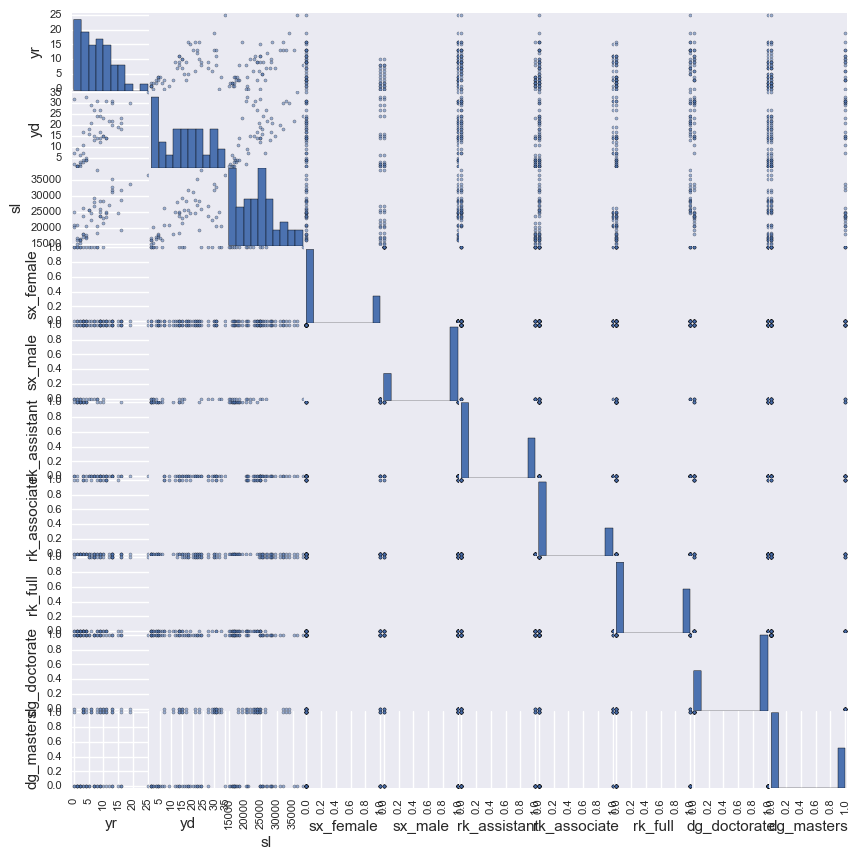

In [11]:
pd.scatter_matrix(df, figsize=(10, 10))
plt.show()

### Here's an example to get you started.

Try reruning the next cell multiple times. You should see an improvement for some samples.

In [305]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", model.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", model.score(X, y)

# Did the results improve?

Sample: 0.888530198386
All data with sample model: -6.47146005434
Sample with regularization: 0.884767711597
All data with regularization model: -4.7661812731


** my answer **

# use men dataset 
# linear model
# test with female

Men: 0.88630543814


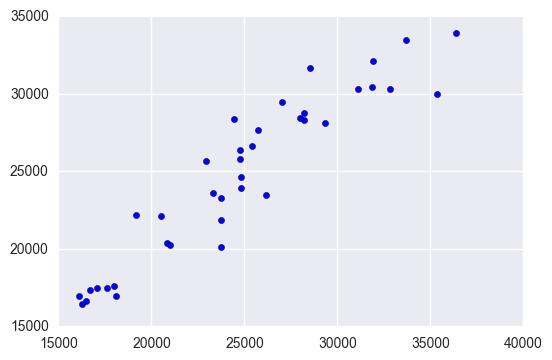

In [306]:
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "Men:", model.score(X, y)





female: 0.69448811957


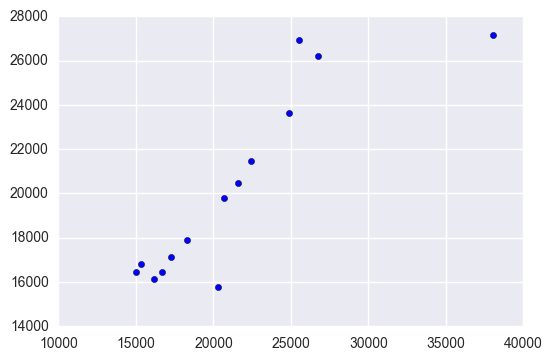

In [307]:
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']


predictions = model.predict(X)
plt.scatter(y,predictions)
print "female:", model.score(X, y)







 find a model based on female data, test by male data

female: 0.781837240731


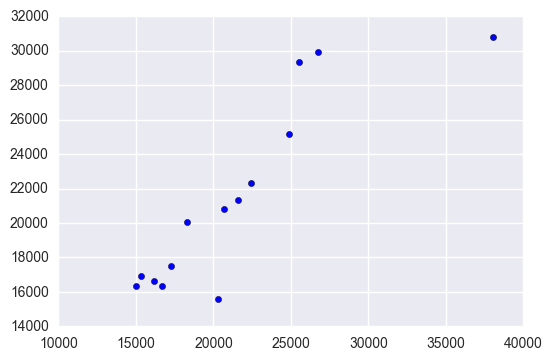

In [308]:
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "female:", model.score(X, y)


male: 0.657523429275


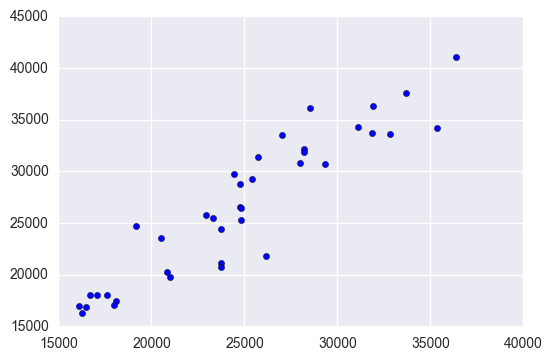

In [309]:
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']


predictions = model.predict(X)
plt.scatter(y,predictions)
print "male:", model.score(X, y)

repeat the above steps for RidgeCV

find the model for female, test with male data

female: 0.755592692047


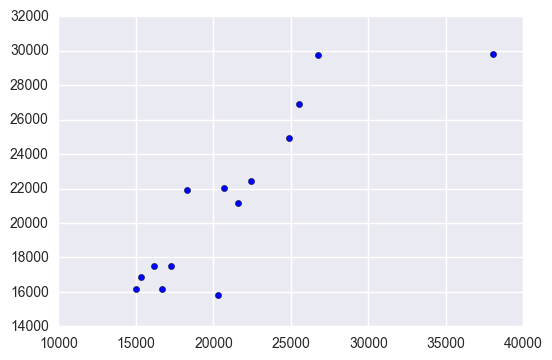

In [310]:
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "female:", model.score(X, y)


male: 0.726774045766


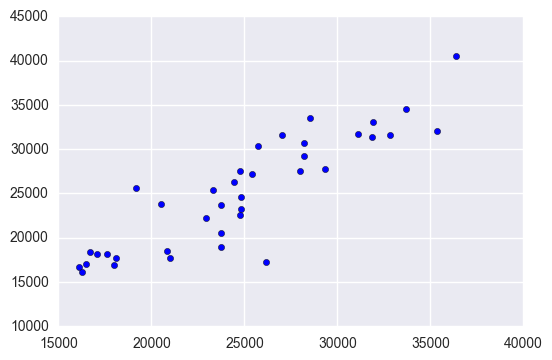

In [311]:
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']


predictions = model.predict(X)
plt.scatter(y,predictions)
print "male:", model.score(X, y)

find a model for male, test with female data, RidgeCV

male: 0.886199410543


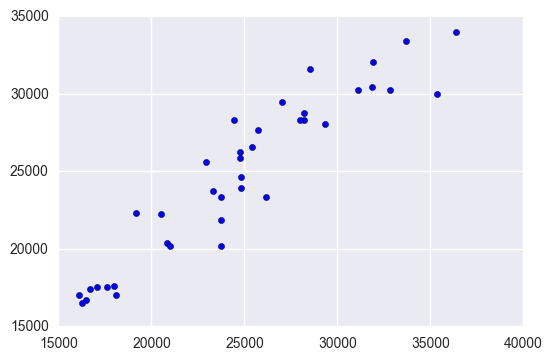

In [312]:
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "male:", model.score(X, y)

female: 0.697333350848


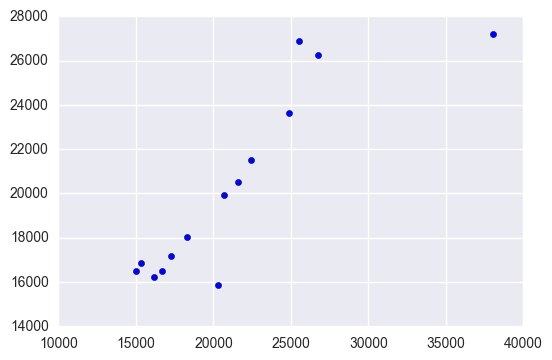

In [313]:
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']


predictions = model.predict(X)
plt.scatter(y,predictions)
print "female:", model.score(X, y)

In [314]:
0.69448811957

0.69448811957

In [315]:
# This time use regularlization (RidgeCV)

# Apply to women first


# Apply to men



### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

**My answr** = yes regularization improves the results for example for female the number with linear model was  0.69448811957  and it improves to 0.69448811957  when we use RidgeCV model

model with the master data, test with doctoral data - RidgeCV

masters: 0.797059287095


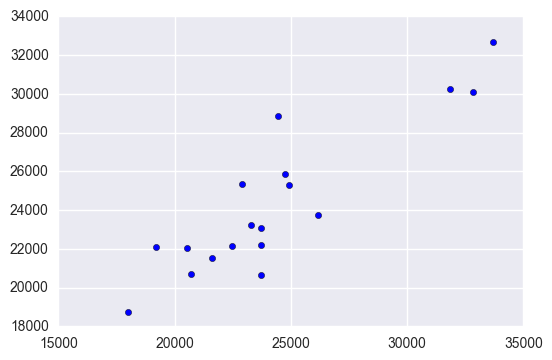

In [316]:
mask = df["dg"] == "masters"
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "masters:", model.score(X, y)

doctorate: 0.751666341869


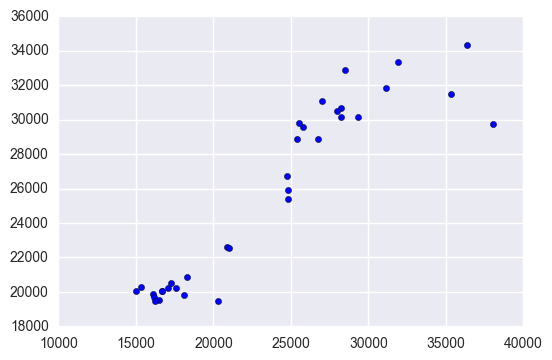

In [317]:
mask = df["dg"] == "doctorate"
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']


predictions = model.predict(X)
plt.scatter(y,predictions)
print "doctorate:", model.score(X, y)

model with the doctoral data, test with master data - linear

doctorate: 0.876486548837


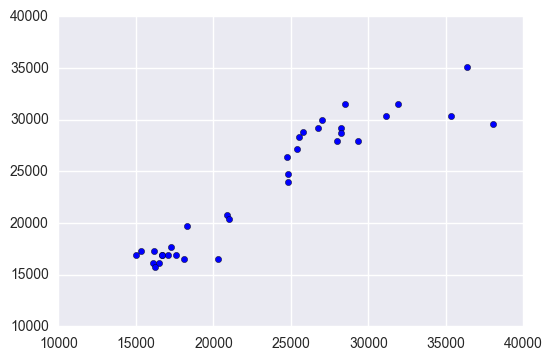

In [318]:
mask = df["dg"] == "doctorate"
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "doctorate:", model.score(X, y)

masters: 0.6849888843


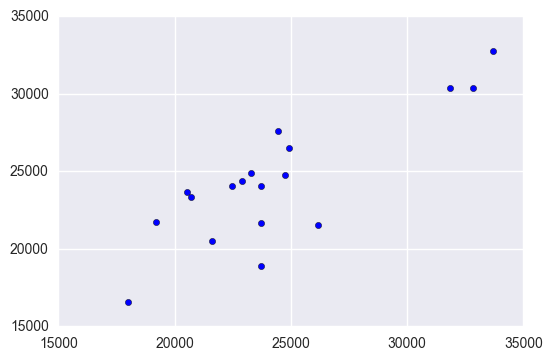

In [319]:
mask = df["dg"] == "masters"
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

predictions = model.predict(X)
plt.scatter(y,predictions)
print "masters:", model.score(X, y)

model with the master data, test with doctoral data - linear

masters: 0.797682614586


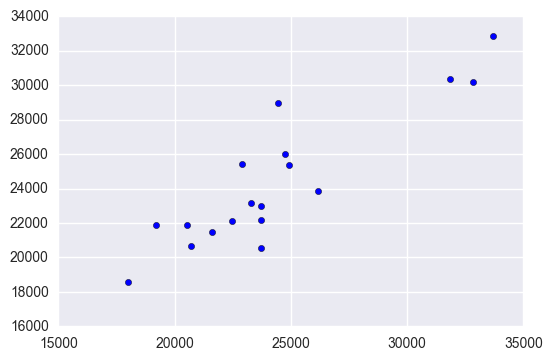

In [320]:
mask = df["dg"] == "masters"
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "masters:", model.score(X, y)

doctorate: 0.745050571834


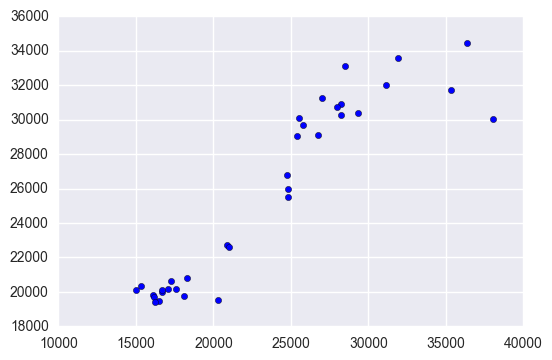

In [321]:
mask = df["dg"] == "doctorate"
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

predictions = model.predict(X)
plt.scatter(y,predictions)
print "doctorate:", model.score(X, y)

model with the doctoral data, test with master data - RidgeCV

doctorate: 0.876362856869


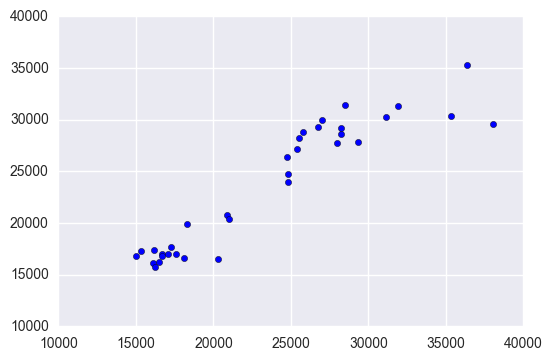

In [322]:
mask = df["dg"] == "doctorate"
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "doctorate:", model.score(X, y)

masters: 0.667049842973


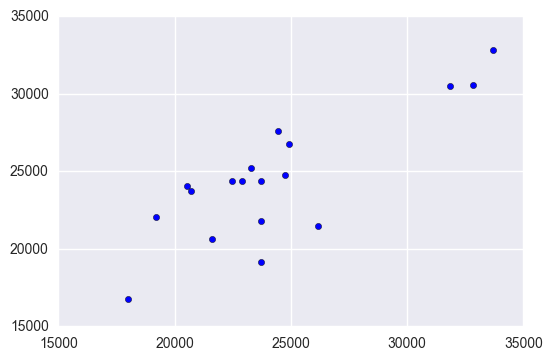

In [323]:
mask = df["dg"] == "masters"
X = df[mask][[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[mask][u'sl']

predictions = model.predict(X)
plt.scatter(y,predictions)
print "masters:", model.score(X, y)

In [324]:
# Reverse the order

mask = (df["dg"] != "doctorate") # !=


In [325]:
# With regularization

mask = (df["dg"] != "doctorate") # !=


### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

model with full - linear

full: 0.518546885368


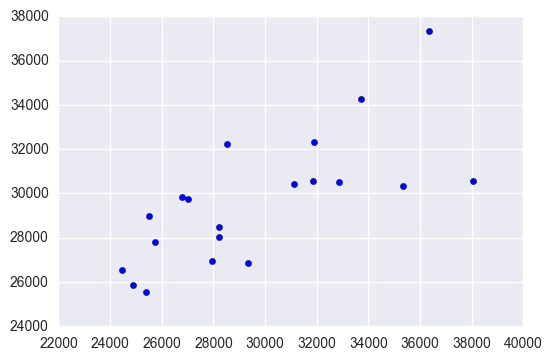

In [326]:

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']


lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "full:", model.score(X, y)

test full model with assistant and associate

Associate and assistants: -4.60483198065


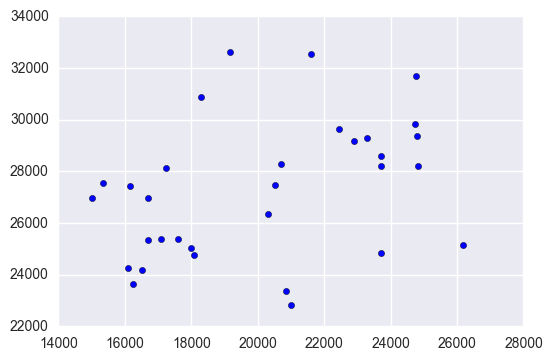

In [327]:
mask = (df["rk"] != "full")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']

predictions = model.predict(X)
plt.scatter(y,predictions)
print "Associate and assistants:", model.score(X, y)

model with full - RidgeCV

full: 0.485373992873


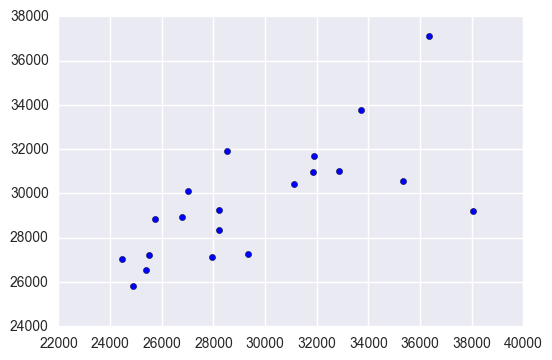

In [328]:
mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "full:", model.score(X, y)

Associate and assistants: -3.32719643087


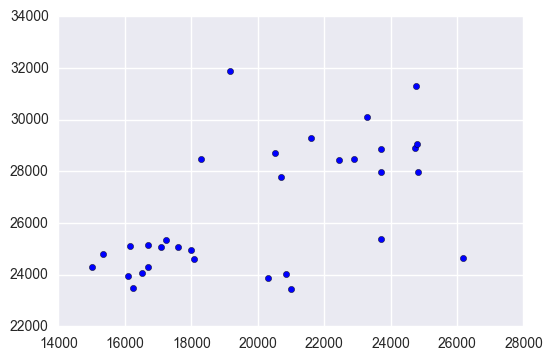

In [329]:
mask = (df["rk"] != "full")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']

predictions = model.predict(X)
plt.scatter(y,predictions)
print "Associate and assistants:", model.score(X, y)

model assistant - linear

assistant: 0.515603387509


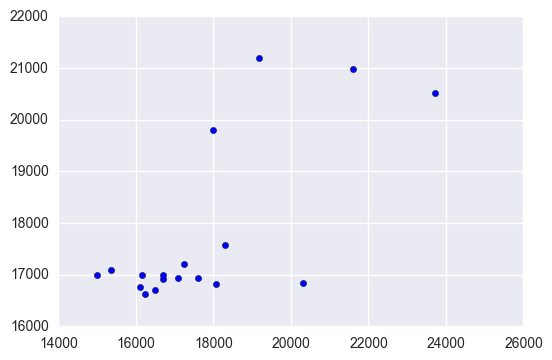

In [330]:
mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']


lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "assistant:", model.score(X, y)

Full and associate: -3.59106141162


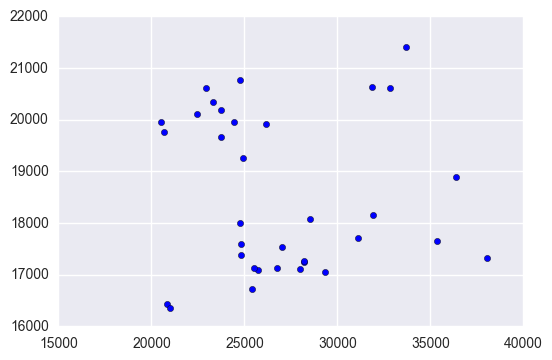

In [331]:
mask = (df["rk"] != "assistant")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']

predictions = model.predict(X)
plt.scatter(y,predictions)
print "Full and associate:", model.score(X, y)

assistant: 0.439463063387


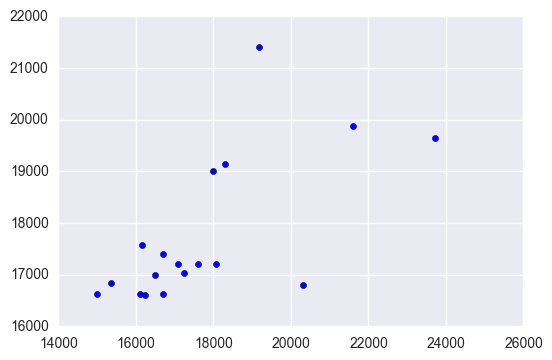

In [332]:
mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "assistant:", model.score(X, y)

Full and Associate: -1.88535555374


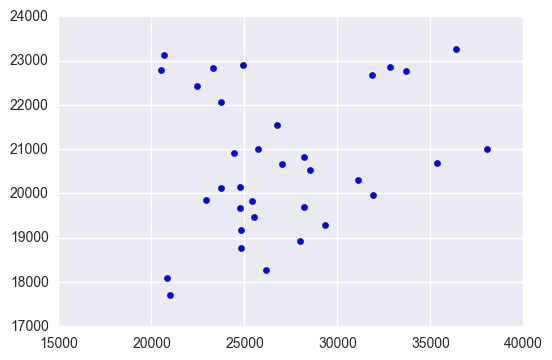

In [333]:
mask = (df["rk"] != "assistant")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']

predictions = model.predict(X)
plt.scatter(y,predictions)
print "Full and Associate:", model.score(X, y)

associate: 0.621136292896


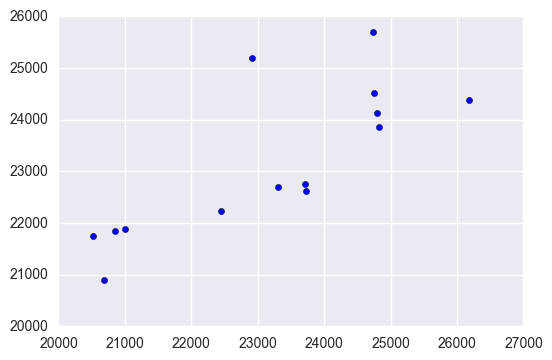

In [334]:
mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']


lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "associate:", model.score(X, y)

Full and Assistance: -0.0835279216007


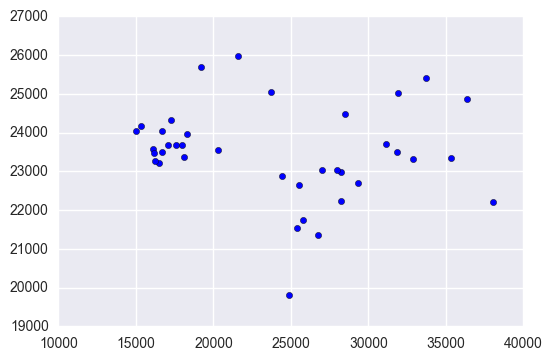

In [335]:
mask = (df["rk"] != "associate")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']

predictions = model.predict(X)
plt.scatter(y,predictions)
print "Full and Assistance:", model.score(X, y)

model assistant - linear

associate: 0.55397558087


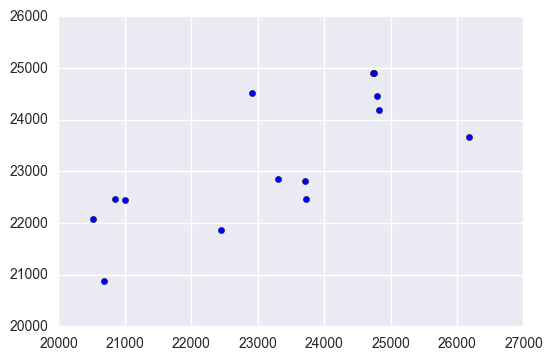

In [336]:
mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
plt.scatter(y,predictions)
print "associate:", model.score(X, y)

Full and Assistance: 0.00645841291651


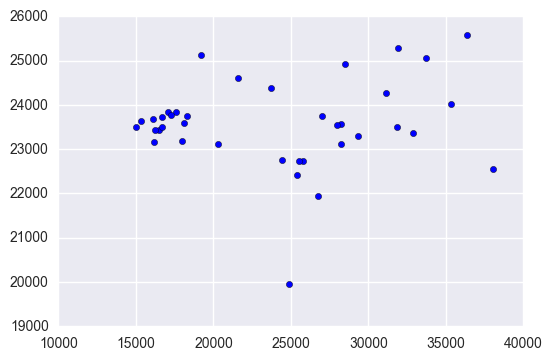

In [337]:
mask = (df["rk"] != "associate")
X = df[mask][[u'yr', u'dg_doctorate',u'dg_masters', u'yd', u'sx_male', u'sx_female']]
y = df[mask][u'sl']

predictions = model.predict(X)
plt.scatter(y,predictions)
print "Full and Assistance:", model.score(X, y)

In [338]:
# The second permutation of three

In [339]:
# The third permutation of three

# Results

How did the regularized models fare?

In [340]:
# the model is not good for ranking. even the regularizaton can not improve the results

### Bonus

Try predicting "yd" by splitting the data on "sx".

In [341]:
# Without regularization
mask = df["sx"] == "female"


In [342]:
# With regularization, RidgeCV

In [343]:
# With regularization, LassoCV